<a href="https://colab.research.google.com/github/SergeiVKalinin/MLSTEM2025/blob/main/Day5/Day_5_Gaussian_Proceses_GPyTorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian processes

The notebook for the Summer ML STEM Course.
- Instructor Sergei V. Kalinin
- Examples adapted from: https://livebook.manning.com/book/bayesian-optimization-in-action/chapter-1/  
- Several examples are based on ChatGPT

In [1]:
!pip install -qq gpytorch
!pip install -qq botorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Conditioning distributions

Visualizing a Multivariate Gaussian Distribution: Means, Variances, and Conditioning

This code illustrates the structure of a **3-dimensional multivariate Gaussian distribution**, defined by a mean vector and a full covariance matrix. Specifically, we consider three random variables \( A \), \( B \), and \( C \), each following a joint Gaussian distribution:

$$
\begin{bmatrix}
A \\
B \\
C
\end{bmatrix}
\sim \mathcal{N}(\boldsymbol{\mu}, \Sigma)
$$

where:

- \( \boldsymbol{\mu} = [1, 4, 3] \) is the mean vector for \( A, B, C \),
- \( \Sigma \) is the \( 3 \times 3 \) covariance matrix containing the variances and covariances:
  $$
  \Sigma =
  \begin{bmatrix}
  1.5^2 & 0.99 & 0.1 \\
  0.99 & 0.2^2 & 0.1 \\
  0.1 & 0.1 & 1^2
  \end{bmatrix}
  $$

We then sample 1000 points from this distribution using `np.random.multivariate_normal`.

The **visualization** consists of:
- The **means** of the three variables, shown as purple dots.
- The **standard deviations** (square roots of the diagonal of the covariance matrix), represented as vertical error bars around the means.




<ipython-input-2-91b1659e76f0>:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(means, cov_matrix, num_samples)


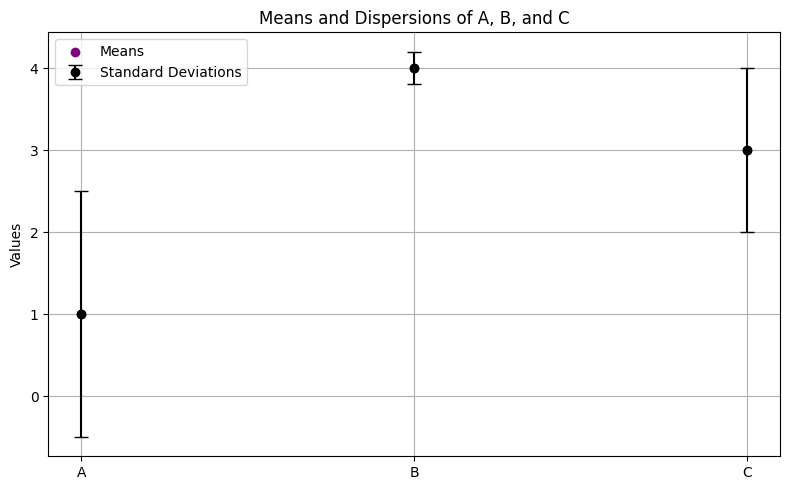

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian distributions
means = np.array([1, 4, 3])  # Means of A, B, C
cov_matrix = np.array([
    [1.5**2, 0.99, 0.1],  # Variance and covariance for A, B, C
    [0.99, 0.2**2, 0.1],
    [0.1, 0.1, 1**2]
])  # Covariance matrix

# Extract standard deviations (sqrt of diagonal elements of covariance matrix)
std_devs = np.sqrt(np.diag(cov_matrix))

# Generate samples from the multivariate Gaussian distribution
num_samples = 1000
data = np.random.multivariate_normal(means, cov_matrix, num_samples)
A, B, C = data[:, 0], data[:, 1], data[:, 2]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot A, B, C as points on X-axis
x_positions = np.arange(1, 4)  # Positions for A, B, C
ax.scatter(x_positions, means, color="purple", label="Means")
ax.errorbar(x_positions, means, yerr=std_devs, fmt="o", color="black", capsize=5, label="Standard Deviations")

# Set x-ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(["A", "B", "C"])
ax.set_title("Means and Dispersions of A, B, and C")
ax.set_ylabel("Values")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


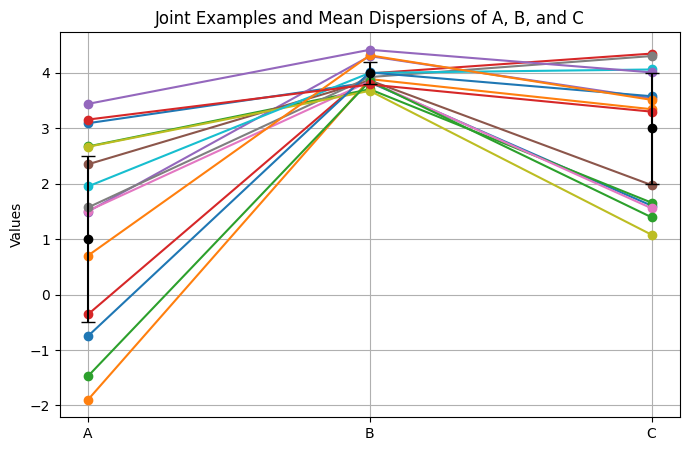

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian distributions
means = np.array([1, 4, 3])  # Means of A, B, C
cov_matrix = np.array([
    [1.5**2, 0, 0.1],  # Variance and covariance for A, B, C
    [0, 0.2**2, 0.1],
    [0.1, 0.1, 1**2]
])  # Covariance matrix

# Extract standard deviations (sqrt of diagonal elements of covariance matrix)
std_devs = np.sqrt(np.diag(cov_matrix))

# Generate samples from the multivariate Gaussian distribution
num_samples = 1000
data = np.random.multivariate_normal(means, cov_matrix, num_samples)
A, B, C = data[:, 0], data[:, 1], data[:, 2]

# Generate a few joint samples from the distribution for visualization
num_samples_to_plot = 15  # Number of joint samples to illustrate
joint_samples = data[:num_samples_to_plot, :]  # Select the first few samples

# Plot the joint examples of values drawn from the distribution
plt.figure(figsize=(8, 5))

# Plot each joint sample as a connected line
for i, sample in enumerate(joint_samples):
    plt.plot(["A", "B", "C"], sample, marker="o", label=f"Sample {i+1}")

# Plot means with error bars derived from the covariance matrix
plt.errorbar(["A", "B", "C"], means, yerr=std_devs, fmt="o", color="black", capsize=5, label="Means with Dispersion")

# Add labels, legend, and grid
plt.title("Joint Examples and Mean Dispersions of A, B, and C")
plt.ylabel("Values")
plt.grid(True)
# Uncomment to show the legend if desired
# plt.legend()
plt.show()



📘 What about conditioning?

In multivariate Gaussian distributions, we can **condition** on one variable to get the distribution of the others. For example, the **conditional distribution** of \( A \) given \( B = b \) (where \( A \) and \( B \) are jointly Gaussian) is also Gaussian, and its parameters are:

**Conditional mean of \( A \) given \( B = b \):**

$$
\mathbb{E}[A \mid B = b] = \mu_A + \Sigma_{AB} \Sigma_{BB}^{-1} (b - \mu_B)
$$

**Conditional variance of \( A \) given \( B \):**

$$
\text{Var}[A \mid B] = \Sigma_{AA} - \Sigma_{AB} \Sigma_{BB}^{-1} \Sigma_{BA}
$$

Where:

- \( \mu_A, \mu_B \) are the means of \( A \) and \( B \),
- \( \Sigma_{AA}, \Sigma_{BB} \) are their variances,
- \( \Sigma_{AB} \) is the covariance between \( A \) and \( B \).

The same rules apply for conditioning on any subset of variables — this is very useful in **Bayesian inference**, **Kalman filters**, and **Gaussian processes**.


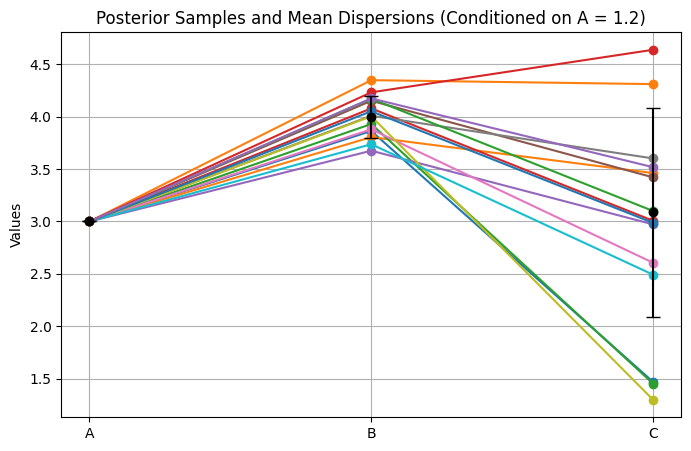

In [4]:
from scipy.stats import multivariate_normal

# Conditioning the distribution on A = 1.2
A_conditioned = 3

# Extract the covariance matrix components
Sigma = cov_matrix
Sigma_aa = Sigma[0, 0]
Sigma_ab = Sigma[0, 1:]
Sigma_bb = Sigma[1:, 1:]

# Compute the mean and covariance of the conditional distribution
mean_b_given_a = means[1:] + Sigma_ab / Sigma_aa * (A_conditioned - means[0])
cov_b_given_a = Sigma_bb - np.outer(Sigma_ab, Sigma_ab) / Sigma_aa

# Generate samples from the posterior distribution
posterior_samples = np.random.multivariate_normal(mean_b_given_a, cov_b_given_a, num_samples_to_plot)

# Plot the posterior samples
plt.figure(figsize=(8, 5))

# Plot each posterior sample as a connected line (with A fixed at 1.2)
for i, sample in enumerate(posterior_samples):
    plt.plot(["A", "B", "C"], [A_conditioned] + sample.tolist(), marker="o", label=f"Posterior Sample {i+1}")

# Plot the posterior mean with error bars
plt.errorbar(
    ["A", "B", "C"],
    [A_conditioned] + mean_b_given_a.tolist(),
    yerr=[0] + [np.sqrt(cov_b_given_a[i, i]) for i in range(2)],
    fmt="o",
    color="black",
    capsize=5,
    label="Posterior Mean with Dispersion"
)

# Add labels, legend, and grid
plt.title("Posterior Samples and Mean Dispersions (Conditioned on A = 1.2)")
plt.ylabel("Values")
plt.grid(True)
#plt.legend()
plt.show()


<ipython-input-5-0e787f9f0664>:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(means, cov_matrix, num_samples)


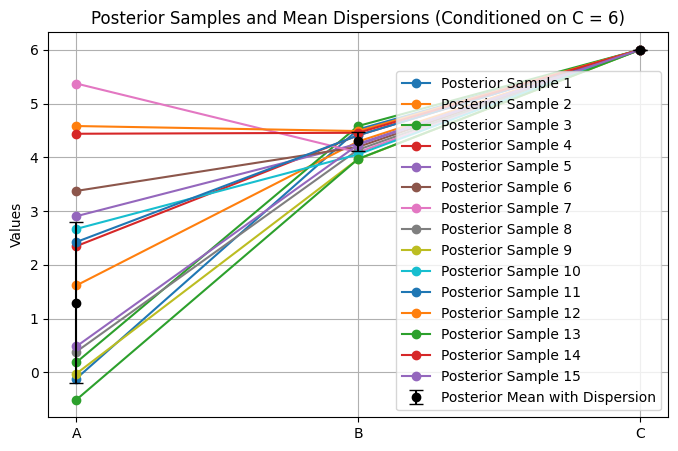

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian distributions
means = np.array([1, 4, 3])  # Means of A, B, C
cov_matrix = np.array([
    [1.5**2, 0.9, 0.1],  # Variance and covariance for A, B, C
    [0.9, 0.2**2, 0.1],
    [0.1, 0.1, 1**2]
])  # Covariance matrix

# Extract standard deviations (sqrt of diagonal elements of covariance matrix)
std_devs = np.sqrt(np.diag(cov_matrix))

# Generate samples from the multivariate Gaussian distribution
num_samples = 1000
data = np.random.multivariate_normal(means, cov_matrix, num_samples)
A, B, C = data[:, 0], data[:, 1], data[:, 2]

# Generate a few joint samples from the distribution for visualization
num_samples_to_plot = 15  # Number of joint samples to illustrate
joint_samples = data[:num_samples_to_plot, :]  # Select the first few samples

# Conditioning the distribution on C = 6
C_conditioned = 6

# Extract the covariance matrix components for conditioning on C
Sigma_cc = Sigma[2, 2]
Sigma_cb = Sigma[2, :2]
Sigma_bb = Sigma[:2, :2]

# Compute the mean and covariance of the conditional distribution
mean_b_given_c = means[:2] + Sigma_cb / Sigma_cc * (C_conditioned - means[2])
cov_b_given_c = Sigma_bb - np.outer(Sigma_cb, Sigma_cb) / Sigma_cc

# Generate samples from the posterior distribution
posterior_samples_c = np.random.multivariate_normal(mean_b_given_c, cov_b_given_c, num_samples_to_plot)

# Plot the posterior samples
plt.figure(figsize=(8, 5))

# Plot each posterior sample as a connected line (with C fixed at 6)
for i, sample in enumerate(posterior_samples_c):
    plt.plot(["A", "B", "C"], sample.tolist() + [C_conditioned], marker="o", label=f"Posterior Sample {i+1}")

# Plot the posterior mean with error bars
plt.errorbar(
    ["A", "B", "C"],
    mean_b_given_c.tolist() + [C_conditioned],
    yerr=[np.sqrt(cov_b_given_c[i, i]) for i in range(2)] + [0],
    fmt="o",
    color="black",
    capsize=5,
    label="Posterior Mean with Dispersion"
)

# Add labels, legend, and grid
plt.title("Posterior Samples and Mean Dispersions (Conditioned on C = 6)")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.show()

🔍 Gaussian Conditioning: How Posterior of B and C Changes with the Value of A

This code explores how the **posterior (conditional) distribution of variables B and C** evolves as we **condition on different values of variable A**, in the context of a **multivariate Gaussian distribution**.
We begin with a **correlation matrix** describing the relationships between three Gaussian variables \( A \), \( B \), and \( C \), and then convert this correlation matrix into a **covariance matrix** using the provided standard deviations:

$$
\Sigma = \text{diag}(\sigma) \cdot \text{Corr} \cdot \text{diag}(\sigma)
$$

where \( \sigma = [1.5, 0.2, 1.0] \) are the standard deviations of \( A, B, C \). The mean vector is given as:

$$
\mu = [1, 4, 3]
$$

We then compute the **conditional distribution** of \( [B, C] \) given that \( A = a \), for many values of \( a \) ranging from 0 to 5.

---

🧮 Conditional Gaussian Formulas Used

Given a joint distribution over \( A \) and \( [B, C] \), the conditional distribution of \( [B, C] \mid A = a \) is again Gaussian:

**Conditional mean:**

$$
\mathbb{E}[B, C \mid A = a] = \mu_{BC} + \Sigma_{BC,A} \Sigma_{AA}^{-1} (a - \mu_A)
$$

**Conditional covariance:**

$$
\text{Cov}[B, C \mid A] = \Sigma_{BC,BC} - \Sigma_{BC,A} \Sigma_{AA}^{-1} \Sigma_{A,BC}
$$

These formulas are used in each iteration of the loop, plugging in the current value of \( A \) being conditioned on.

---

📈 What the plot shows:

- The **solid blue and green lines** represent the **posterior means** of \( B \) and \( C \), respectively, as a function of the conditioned value \( A \).
- The **shaded regions** represent **±1 standard deviation** of the conditional (posterior) distributions — that is, the spread or uncertainty in \( B \) and \( C \) after observing \( A = a \).

As we change the value of \( A \), the means of \( B \) and \( C \) shift according to the correlation structure between the variables. The posterior variances remain constant in this case because we are only conditioning on one variable and keeping its variance fixed.

---

This code provides an intuition for how **observing one variable (A)** in a multivariate Gaussian impacts our **belief (mean and uncertainty)** about the others (B and C).

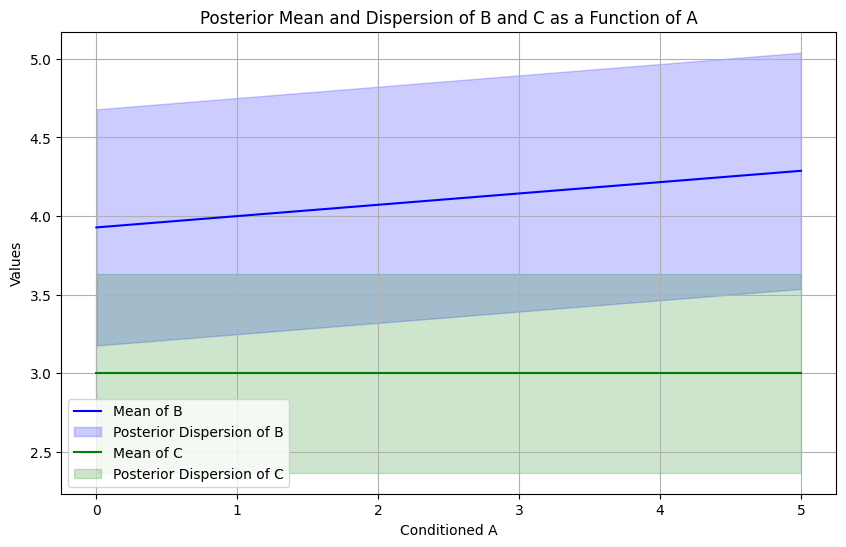

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#try 0.9 vs. 0.09

# Define the initial correlation matrix and convert it to a covariance matrix
correlation_matrix = np.array([
    [1.0, 0.09, 0],  # Correlation coefficients for A, B, C
    [0.09, 0.4, 0.5],
    [0, 0.5, 0.4]
])

# Define standard deviations for A, B, C
std_devs = np.array([1.5, 1.2, 1.0])

# Convert correlation matrix to covariance matrix
cov_matrix = np.diag(std_devs) @ correlation_matrix @ np.diag(std_devs)

# Define the means for A, B, C
means = np.array([1, 4, 3])

# Define the range of A to condition on
A_conditioned_values = np.linspace(0, 5, 100)

# Initialize arrays to store posterior means and standard deviations for B and C
mean_b_given_a_values = []
mean_c_given_a_values = []
std_b_given_a_values = []
std_c_given_a_values = []

# Loop over the values of A to compute conditional statistics for B and C
for A_conditioned in A_conditioned_values:
    # Mean of B and C given A
    mean_given_a = means[1:] + (cov_matrix[1:, 0] / cov_matrix[0, 0]) * (A_conditioned - means[0])
    # Covariance of B and C given A
    cov_given_a = cov_matrix[1:, 1:] - np.outer(cov_matrix[1:, 0], cov_matrix[1:, 0]) / cov_matrix[0, 0]

    # Append mean and standard deviations
    mean_b_given_a_values.append(mean_given_a[0])
    mean_c_given_a_values.append(mean_given_a[1])
    std_b_given_a_values.append(np.sqrt(cov_given_a[0, 0]))
    std_c_given_a_values.append(np.sqrt(cov_given_a[1, 1]))

# Convert lists to numpy arrays
mean_b_given_a_values = np.array(mean_b_given_a_values)
mean_c_given_a_values = np.array(mean_c_given_a_values)
std_b_given_a_values = np.array(std_b_given_a_values)
std_c_given_a_values = np.array(std_c_given_a_values)

# Plot the mean and posterior dispersion for B and C
plt.figure(figsize=(10, 6))

# Mean and dispersion for B
plt.plot(A_conditioned_values, mean_b_given_a_values, label="Mean of B", color="blue")
plt.fill_between(A_conditioned_values,
                 mean_b_given_a_values - std_b_given_a_values,
                 mean_b_given_a_values + std_b_given_a_values,
                 color="blue", alpha=0.2, label="Posterior Dispersion of B")

# Mean and dispersion for C
plt.plot(A_conditioned_values, mean_c_given_a_values, label="Mean of C", color="green")
plt.fill_between(A_conditioned_values,
                 mean_c_given_a_values - std_c_given_a_values,
                 mean_c_given_a_values + std_c_given_a_values,
                 color="green", alpha=0.2, label="Posterior Dispersion of C")

# Labels, legend, and grid
plt.title("Posterior Mean and Dispersion of B and C as a Function of A")
plt.xlabel("Conditioned A")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()



🔄 Conditioning in Multivariate Gaussian: Effect of Variance in the Conditioned Variable

This code illustrates a key concept in multivariate Gaussian distributions: **how the conditional distribution of some variables (B and C) changes depending on the variance of another variable (A)** we are conditioning on.

We start with a 3-dimensional Gaussian distribution over variables \( A, B, C \), specified by:

- A **mean vector** \( \boldsymbol{\mu} = [1, 4, 3] \)
- A **covariance matrix**:

$$
\Sigma =
\begin{bmatrix}
\text{Var}(A) & \text{Cov}(A, B) & \text{Cov}(A, C) \\
\text{Cov}(B, A) & \text{Var}(B) & \text{Cov}(B, C) \\
\text{Cov}(C, A) & \text{Cov}(C, B) & \text{Var}(C)
\end{bmatrix}
$$

In this code, we explore what happens to the conditional mean and standard deviation (dispersion) of \( B \) and \( C \) **as the variance of \( A \) decreases**, ranging from 4 down to 0.1.

---

🧮 What is being computed?

For each value of \( \text{Var}(A) \), we compute the **conditional distribution of \( B, C \mid A = 2 \)** using the Gaussian conditioning formulas:

**Conditional mean:**

Let \( \mu = \begin{bmatrix} \mu_A \\ \mu_{BC} \end{bmatrix} \), and \( \Sigma = \begin{bmatrix} \Sigma_{AA} & \Sigma_{A,BC} \\ \Sigma_{BC,A} & \Sigma_{BC,BC} \end{bmatrix} \)

Then the conditional mean of \( B \) and \( C \) given \( A = a \) is:

$$
\mathbb{E}[B, C \mid A = a] = \mu_{BC} + \Sigma_{BC,A} \Sigma_{AA}^{-1} (a - \mu_A)
$$

**Conditional covariance:**

$$
\text{Cov}[B, C \mid A] = \Sigma_{BC,BC} - \Sigma_{BC,A} \Sigma_{AA}^{-1} \Sigma_{A,BC}
$$

These are computed for each value of \( \text{Var}(A) \), while keeping the covariances between variables fixed.

---

📈 What the plot shows:

- The **solid lines** show the **conditional means** of \( B \) (blue) and \( C \) (green) as the variance of \( A \) changes.
- The **shaded regions** around each mean represent **±1 standard deviation** of the conditional distribution, derived from the conditional covariance.
- As \( \text{Var}(A) \to 0 \), the influence of \( A = 2 \) becomes dominant, and the conditional variance of \( B \) and \( C \) shrinks (i.e., the distribution collapses to a line).
- As \( \text{Var}(A) \) increases, the conditional influence of \( A \) weakens, and \( B \), \( C \) revert toward their marginal distributions.

---

This is an illustration of how **information content in conditioning variables** (captured by their variance) impacts uncertainty in the conditional distribution. It mirrors what happens in Bayesian inference, Kalman filtering, and Gaussian process regression.


<ipython-input-7-ef70dc5395e5>:42: RuntimeWarning: invalid value encountered in sqrt
  std_b_given_a_values.append(np.sqrt(cov_given_a[0, 0]))


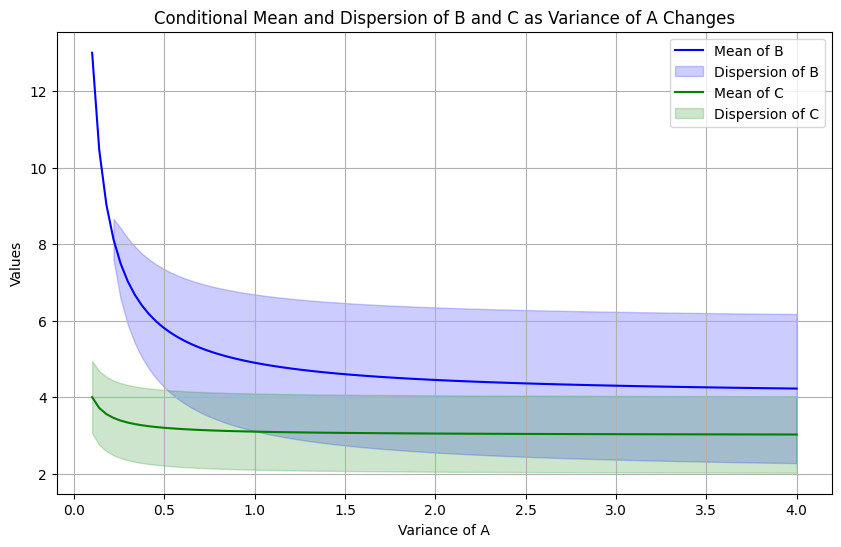

In [7]:
# Initialize all parameters at the beginning
import numpy as np
import matplotlib.pyplot as plt

# Means of A, B, C
means = np.array([1, 4, 3])

# Covariance matrix of A, B, C
cov_matrix = np.array([
    [1.5**2, 0.9, 0.1],
    [0.9, 2**2, 0.1],
    [0.1, 0.1, 1**2]
])

# Range of variances for A (from 4 to a small positive value)
variance_a_values = np.linspace(4, 0.1, 100)

# Fixed value of A
A_conditioned = 2

# Initialize arrays to store posterior means and standard deviations for B and C
mean_b_given_a_values = []
mean_c_given_a_values = []
std_b_given_a_values = []
std_c_given_a_values = []

# Main calculation loop for conditional statistics
for variance_a in variance_a_values:
    # Update the variance of A in the covariance matrix
    cov_matrix_updated = cov_matrix.copy()
    cov_matrix_updated[0, 0] = variance_a  # Update variance of A

    # Compute the mean of B and C given A
    mean_given_a = means[1:] + (cov_matrix_updated[1:, 0] / variance_a) * (A_conditioned - means[0])

    # Compute the covariance of B and C given A
    cov_given_a = cov_matrix_updated[1:, 1:] - np.outer(cov_matrix_updated[1:, 0], cov_matrix_updated[1:, 0]) / variance_a

    # Append mean and standard deviations
    mean_b_given_a_values.append(mean_given_a[0])
    mean_c_given_a_values.append(mean_given_a[1])
    std_b_given_a_values.append(np.sqrt(cov_given_a[0, 0]))
    std_c_given_a_values.append(np.sqrt(cov_given_a[1, 1]))

# Convert lists to numpy arrays
mean_b_given_a_values = np.array(mean_b_given_a_values)
mean_c_given_a_values = np.array(mean_c_given_a_values)
std_b_given_a_values = np.array(std_b_given_a_values)
std_c_given_a_values = np.array(std_c_given_a_values)

# Plot the conditional means and dispersions for B and C
plt.figure(figsize=(10, 6))

# Plot mean and dispersion for B
plt.plot(variance_a_values, mean_b_given_a_values, label="Mean of B", color="blue")
plt.fill_between(variance_a_values,
                 mean_b_given_a_values - std_b_given_a_values,
                 mean_b_given_a_values + std_b_given_a_values,
                 color="blue", alpha=0.2, label="Dispersion of B")

# Plot mean and dispersion for C
plt.plot(variance_a_values, mean_c_given_a_values, label="Mean of C", color="green")
plt.fill_between(variance_a_values,
                 mean_c_given_a_values - std_c_given_a_values,
                 mean_c_given_a_values + std_c_given_a_values,
                 color="green", alpha=0.2, label="Dispersion of C")

# Add labels, legend, and grid
plt.title("Conditional Mean and Dispersion of B and C as Variance of A Changes")
plt.xlabel("Variance of A")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()



# From 3 to Many: Gaussian Process

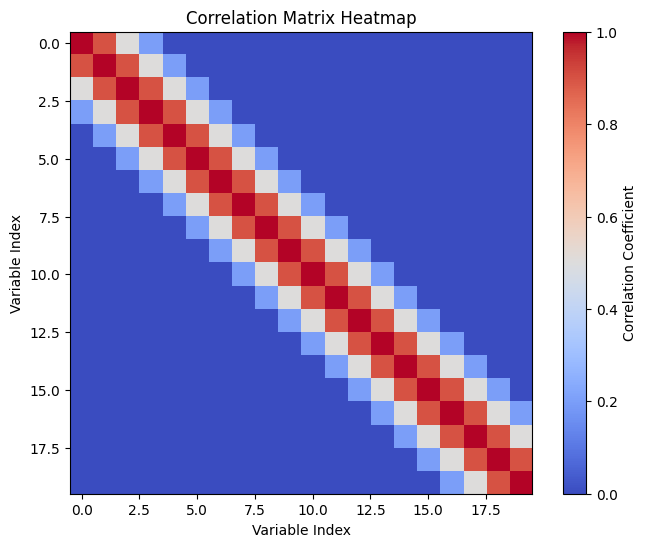

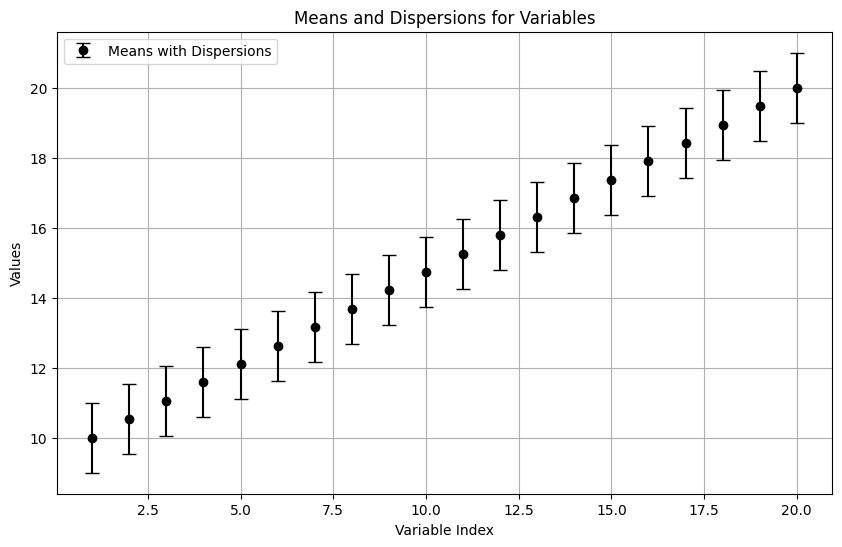

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
num_vars = 20  # Number of variables
means = np.linspace(10, 20, num_vars)  # Means are linearly spaced from 10 to 20

# Initialize correlation matrix
correlation_matrix = np.zeros((num_vars, num_vars))
for i in range(num_vars):
    for j in range(num_vars):
        if i == j:
            correlation_matrix[i, j] = 1.0  # Main diagonal
        elif abs(i - j) == 1:
            correlation_matrix[i, j] = 0.9  # First off-diagonal
        elif abs(i - j) == 2:
            correlation_matrix[i, j] = 0.5  # Second off-diagonal
        elif abs(i - j) == 3:
            correlation_matrix[i, j] = 0.2  # Second off-diagonal

# Ensure the matrix is symmetric
correlation_matrix = (correlation_matrix + correlation_matrix.T) / 2

# Generate covariance matrix by scaling with arbitrary variances
variances = np.linspace(1, 1, num_vars)  # Variances for each variable
covariance_matrix = correlation_matrix * np.outer(variances, variances)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Variable Index")
plt.ylabel("Variable Index")
plt.grid(False)
plt.show()

# Plot means and dispersions
plt.figure(figsize=(10, 6))
x_indices = np.arange(1, num_vars + 1)
plt.errorbar(x_indices, means, yerr=np.sqrt(variances), fmt="o", color="black", capsize=5, label="Means with Dispersions")
plt.title("Means and Dispersions for Variables")
plt.xlabel("Variable Index")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.show()


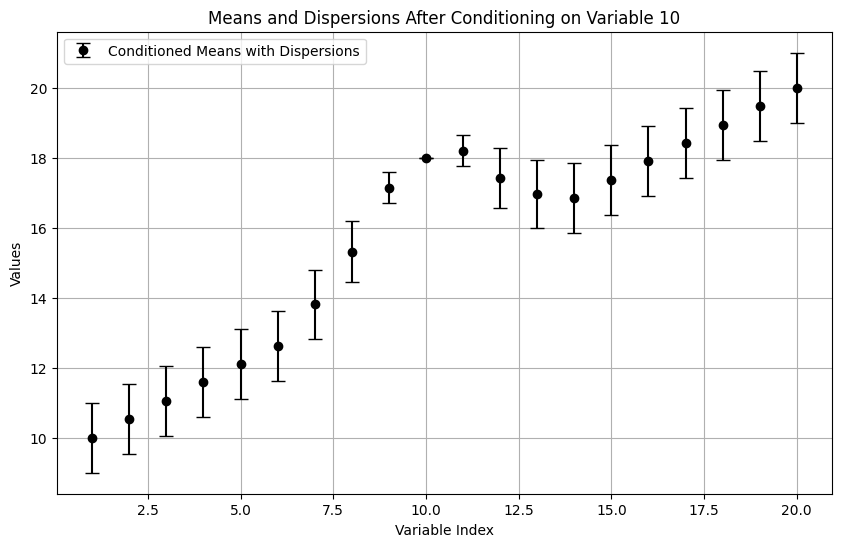

In [9]:
# Conditioning on variable 10 (index 9 in zero-based indexing) to have a value of 18
conditioned_index = 9
conditioned_value = 18

# Compute the conditional mean and covariance
# Partition the covariance matrix and mean vector
indices = np.arange(num_vars)
other_indices = indices[indices != conditioned_index]

mean_cond = means[other_indices] + (
    covariance_matrix[other_indices, conditioned_index]
    / covariance_matrix[conditioned_index, conditioned_index]
) * (conditioned_value - means[conditioned_index])

cov_cond = (
    covariance_matrix[np.ix_(other_indices, other_indices)]
    - np.outer(
        covariance_matrix[other_indices, conditioned_index],
        covariance_matrix[other_indices, conditioned_index],
    )
    / covariance_matrix[conditioned_index, conditioned_index]
)

# Create a full conditioned mean and variances array for all variables
conditioned_means = means.copy()
conditioned_means[other_indices] = mean_cond
conditioned_means[conditioned_index] = conditioned_value

conditioned_variances = np.zeros(num_vars)
conditioned_variances[conditioned_index] = 0  # Variance for conditioned variable is 0
conditioned_variances[other_indices] = np.diag(cov_cond)

# Plot the conditioned means and dispersions
plt.figure(figsize=(10, 6))
x_indices = np.arange(1, num_vars + 1)
plt.errorbar(
    x_indices,
    conditioned_means,
    yerr=np.sqrt(conditioned_variances),
    fmt="o",
    color="black",
    capsize=5,
    label="Conditioned Means with Dispersions",
)
plt.title("Means and Dispersions After Conditioning on Variable 10")
plt.xlabel("Variable Index")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-10-821dd2144f63>:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  original_samples = np.random.multivariate_normal(means, covariance_matrix, num_samples)
<ipython-input-10-821dd2144f63>:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  conditioned_samples[i, other_indices] = np.random.multivariate_normal(mean_cond, cov_cond)


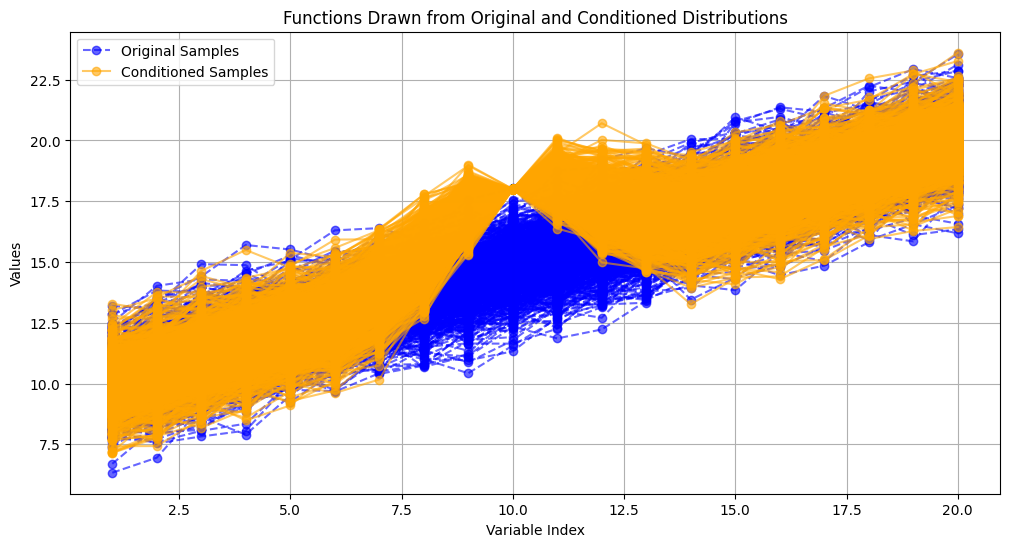

In [10]:
# Correcting the sampling to ensure variable 10 is fixed at 18 in the conditioned samples
# Original samples
original_samples = np.random.multivariate_normal(means, covariance_matrix, num_samples)

# Conditioned samples
conditioned_samples = np.zeros((num_samples, num_vars))

# Set variable 10 to 18 for all conditioned samples
conditioned_samples[:, conditioned_index] = conditioned_value

# Sample the remaining variables from the conditioned distribution
for i in range(num_samples):
    conditioned_samples[i, other_indices] = np.random.multivariate_normal(mean_cond, cov_cond)

# Plot the original and conditioned samples
plt.figure(figsize=(12, 6))

# Plot original samples
for i, sample in enumerate(original_samples):
    plt.plot(
        np.arange(1, num_vars + 1),
        sample,
        marker="o",
        linestyle="--",
        label="Original Samples" if i == 0 else "",
        color="blue",
        alpha=0.6,
    )

# Plot conditioned samples
for i, sample in enumerate(conditioned_samples):
    plt.plot(
        np.arange(1, num_vars + 1),
        sample,
        marker="o",
        linestyle="-",
        label="Conditioned Samples" if i == 0 else "",
        color="orange",
        alpha=0.6,
    )

# Add plot details
plt.title("Functions Drawn from Original and Conditioned Distributions")
plt.xlabel("Variable Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


# GPyTorch

In [11]:
!pip install -qq gpytorch

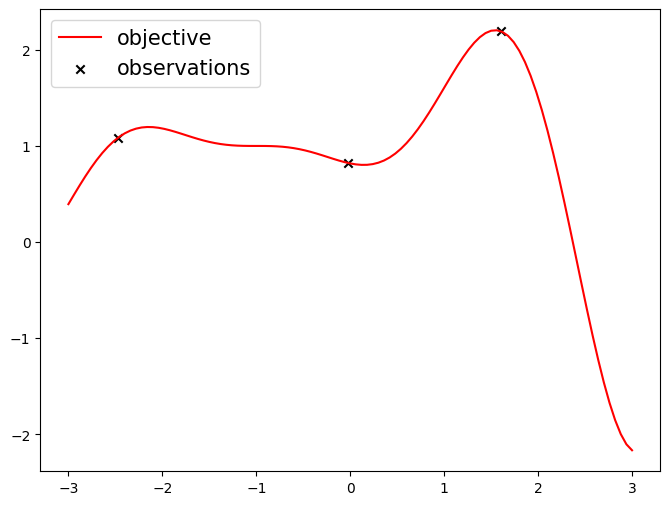

In [12]:
import torch
import matplotlib.pyplot as plt

def forrester_1d(x):
    y = -((x + 1) ** 2) * torch.sin(2 * x + 2) / 5 + 1
    return y.squeeze(-1)

xs = torch.linspace(-3, 3, 101).unsqueeze(1)
ys = forrester_1d(xs)

torch.manual_seed(0)
train_x = torch.rand(size=(3, 1)) * 6 - 3
train_y = forrester_1d(train_x)

plt.figure(figsize=(8, 6))

plt.plot(xs, ys, label="objective", c="r")
plt.scatter(train_x, train_y, marker="x", c="k", label="observations")

plt.legend(fontsize=15);

In [13]:
import gpytorch

class BaseGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [14]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = BaseGPModel(None, None, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

In [15]:
with torch.no_grad():
    predictive_distribution = likelihood(model(xs))
    predictive_mean = predictive_distribution.mean
    predictive_lower, predictive_upper = predictive_distribution.confidence_region()

    torch.manual_seed(0)
    samples = predictive_distribution.sample(torch.Size([5]))

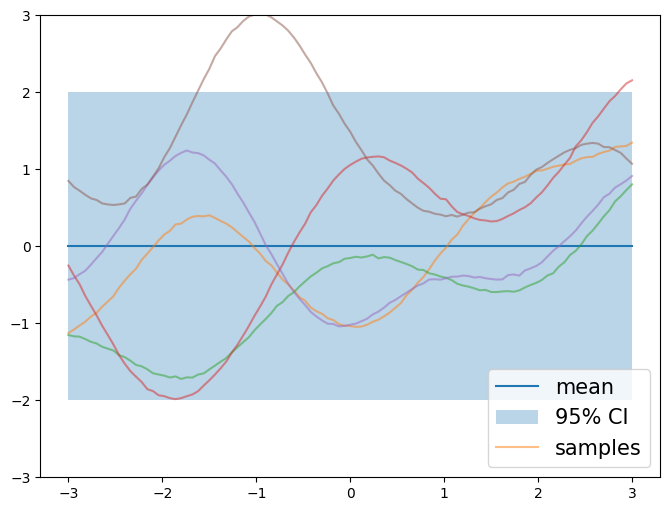

In [16]:
plt.figure(figsize=(8, 6))

plt.plot(xs, predictive_mean.detach(), label="mean")
plt.fill_between(xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95% CI")
plt.plot(xs, samples[0, :], alpha=0.5, label="samples")

for i in range(1, samples.shape[0]):
    plt.plot(xs, samples[i, :], alpha=0.5)

plt.ylim(-3, 3)

plt.legend(fontsize=15);

In [17]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = BaseGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

In [18]:
with torch.no_grad():
    predictive_distribution = likelihood(model(xs))
    predictive_mean = predictive_distribution.mean
    predictive_lower, predictive_upper = predictive_distribution.confidence_region()

    torch.manual_seed(0)
    samples = predictive_distribution.sample(torch.Size([5]))

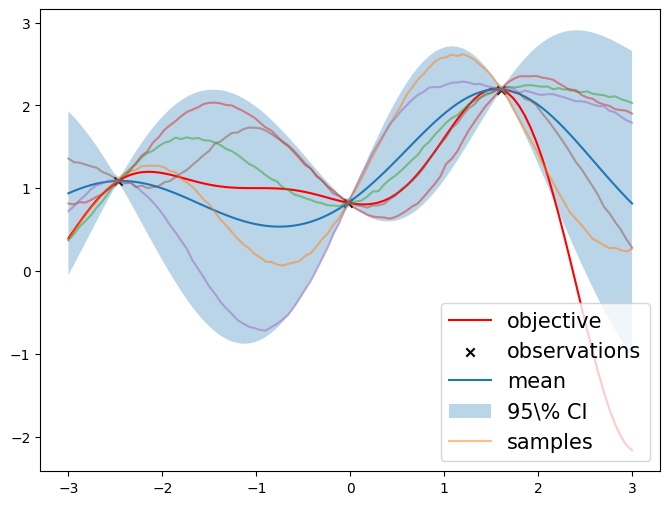

In [19]:
plt.figure(figsize=(8, 6))

plt.plot(xs, ys, label="objective", c="r")
plt.scatter(train_x, train_y, marker="x", c="k", label="observations")

plt.plot(xs, predictive_mean, label="mean")
plt.fill_between(xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95\% CI")

plt.plot(xs, samples[0, :], alpha=0.5, label="samples")

for i in range(1, samples.shape[0]):
    plt.plot(xs, samples[i, :], alpha=0.5)

plt.legend(fontsize=15);

In [20]:
train_x = torch.tensor([[0.0, 0.0], [1.0, 2.0], [-1.0, 1.0]])

train_y = torch.tensor([0.0, -1.0, 0.5])
grid_x = torch.linspace(-3, 3, 101)

grid_x1, grid_x2 = torch.meshgrid(grid_x, grid_x, indexing="ij")
xs = torch.vstack([grid_x1.flatten(), grid_x2.flatten()]).transpose(-1, -2)
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = BaseGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

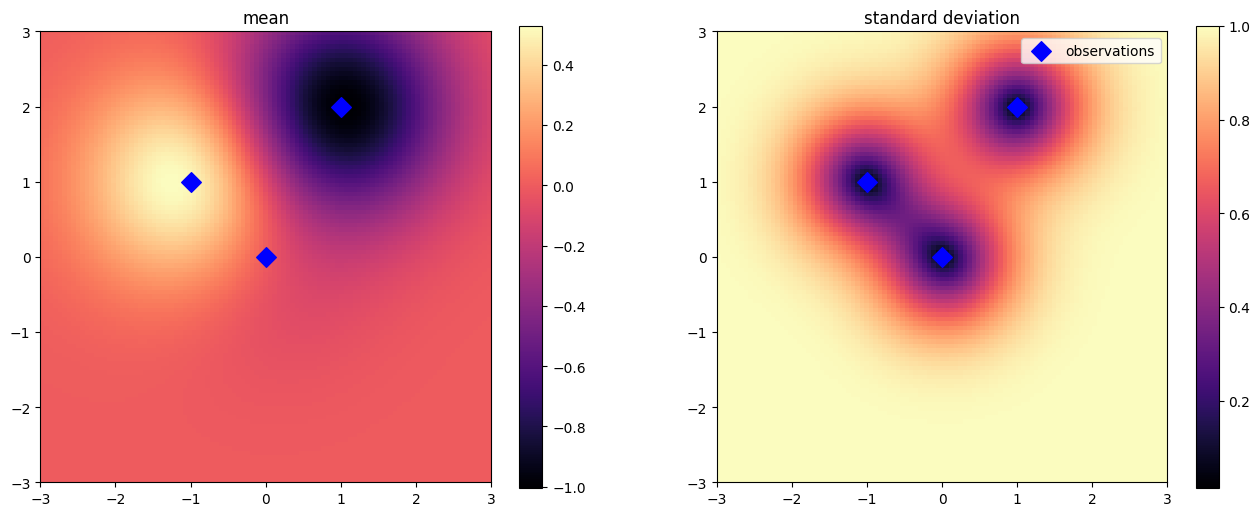

In [21]:
with torch.no_grad():
    predictive_distribution = likelihood(model(xs))
    predictive_mean = predictive_distribution.mean
    predictive_stddev = predictive_distribution.stddev
plt.rcParams["image.cmap"] = "magma"
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

c = ax[0].imshow(
    predictive_mean.detach().reshape(101, 101).transpose(-1, -2),
    origin="lower",
    extent=[-3, 3, -3, 3],
)
plt.colorbar(c, ax=ax[0])

ax[0].scatter(train_x[:, 0], train_x[:, 1], c="blue", marker="D", s=100)

ax[0].set_title("mean")

c = ax[1].imshow(
    predictive_stddev.detach().reshape(101, 101).transpose(-1, -2),
    origin="lower",
    extent=[-3, 3, -3, 3],
)
plt.colorbar(c, ax=ax[1])

ax[1].scatter(
    train_x[:, 0], train_x[:, 1], c="blue", marker="D", s=100, label="observations"
)

ax[1].set_title("standard deviation")

ax[1].legend()

plt.show()

# Kernel engineering

### Define kernel

In [22]:
import torch
import gpytorch

from math import pi

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues_r"

from tqdm.notebook import tqdm

In [23]:
def forrester_1d(x):
    # a modification of https://www.sfu.ca/~ssurjano/forretal08.html
    y = -((x + 1) ** 2) * torch.sin(2 * x + 2) / 5 + 1
    return y.squeeze(-1)


def visualize_gp_belief(model, likelihood, num_samples=5):
    with torch.no_grad():
        predictive_distribution = likelihood(model(xs))
        predictive_mean = predictive_distribution.mean
        predictive_upper, predictive_lower = predictive_distribution.confidence_region()

    plt.figure(figsize=(8, 6))

    plt.plot(xs, ys, label="objective", c="r")
    plt.scatter(train_x, train_y, marker="x", c="k", label="observations")

    plt.plot(xs, predictive_mean, label="mean")
    plt.fill_between(
        xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95% CI"
    )

    torch.manual_seed(0)
    for i in range(num_samples):
        plt.plot(xs, predictive_distribution.sample(), alpha=0.5, linewidth=2)

    plt.legend(fontsize=15)
    plt.show()

In [24]:
xs = torch.linspace(-3, 3, 101).unsqueeze(1)
ys = forrester_1d(xs)

torch.manual_seed(0)
train_x = torch.rand(size=(3, 1)) * 6 - 3
train_y = forrester_1d(train_x)

In [25]:
class ScaleGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

This code sets up a Gaussian Process (GP) regression model using the `gpytorch` library, with fixed hyperparameters for educational or diagnostic purposes. The `lengthscale`, `outputscale`, and `noise` variables define the behavior of the GP kernel and likelihood. The lengthscale controls how quickly the function can vary with input — a smaller value leads to sharper, more rapid changes, while a larger value makes the GP smoother. The outputscale determines the vertical amplitude or variability of the GP's predictions. The noise term defines the assumed observational noise level in the data; setting it to a small value like `1e-4` approximates a nearly noise-free interpolation.

The model is created using `ScaleGPModel`, a custom GP class based on `gpytorch.models.ExactGP` which wraps a scaled kernel such as RBF. The `GaussianLikelihood` assumes that observations are real-valued and corrupted by Gaussian noise. Instead of learning the hyperparameters through optimization, the code manually sets them by assigning values to the model's kernel and likelihood objects. This allows the user to explicitly control the GP's behavior and observe how the shape of the predictive distribution changes.

After setting the parameters, the model is switched to evaluation mode using `.eval()`, which disables training-specific behavior like gradient tracking. Finally, the `visualize_gp_belief` function is called, which likely plots the GP’s posterior mean and uncertainty (typically shown as shaded regions), along with the training data points.


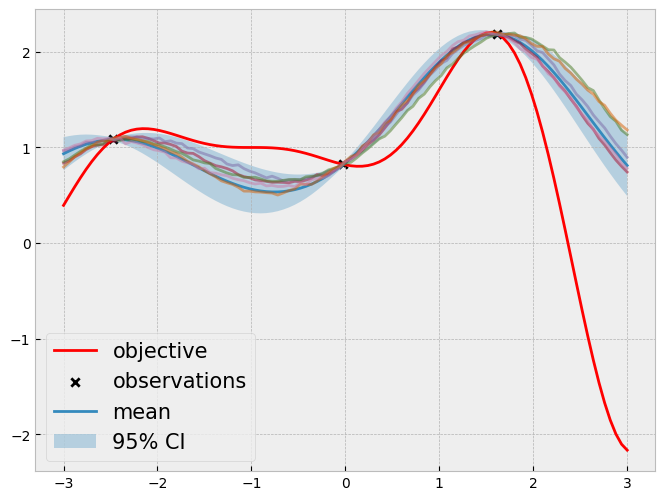

In [26]:
# declare the GP
lengthscale = 1  # 0.3, 1, 3
outputscale = 0.03  # 0.3, 1, 3
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ScaleGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.base_kernel.lengthscale = lengthscale
model.covar_module.outputscale = outputscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)
#model.likelihood.noise

### Train kernel parameters

In [27]:
# train the hyperparameter (the constant)
optimizer = torch.optim.Adam(model.covar_module.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()

losses = []
lengthscales = []
outputscales = []

for i in tqdm(range(500)):
    optimizer.zero_grad()

    output = model(train_x)
    loss = -mll(output, train_y)

    loss.backward()

    losses.append(loss.item())
    lengthscales.append(model.covar_module.base_kernel.lengthscale.item())
    outputscales.append(model.covar_module.outputscale.item())

    optimizer.step()

model.eval()
likelihood.eval()

  0%|          | 0/500 [00:00<?, ?it/s]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

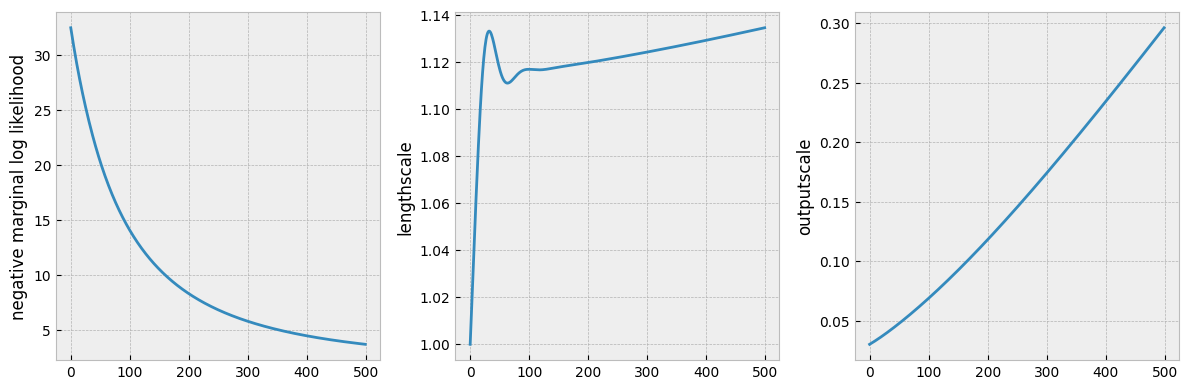

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(losses)
ax[0].set_ylabel("negative marginal log likelihood")

ax[1].plot(lengthscales)
ax[1].set_ylabel("lengthscale")

ax[2].plot(outputscales)
ax[2].set_ylabel("outputscale")

plt.tight_layout();

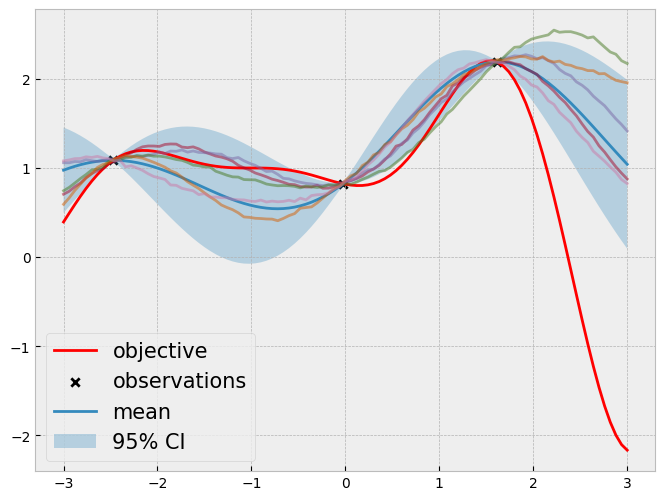

In [29]:
visualize_gp_belief(model, likelihood)

### Experiment with kernel types

In [30]:
class RBFGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

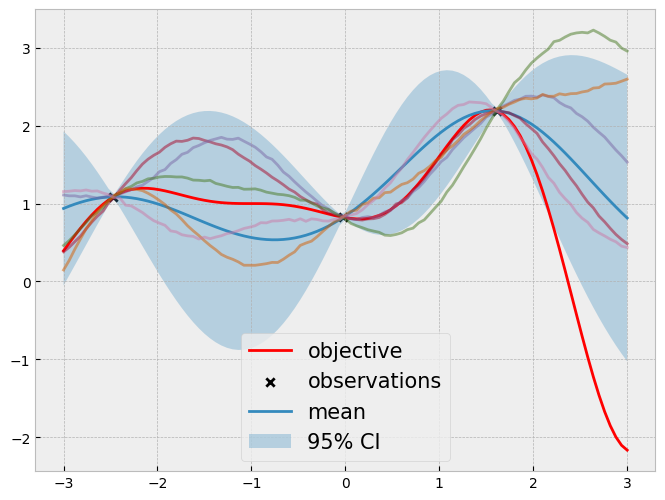

In [31]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = RBFGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)

In [32]:
class MaternGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood, nu):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.MaternKernel(nu)

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

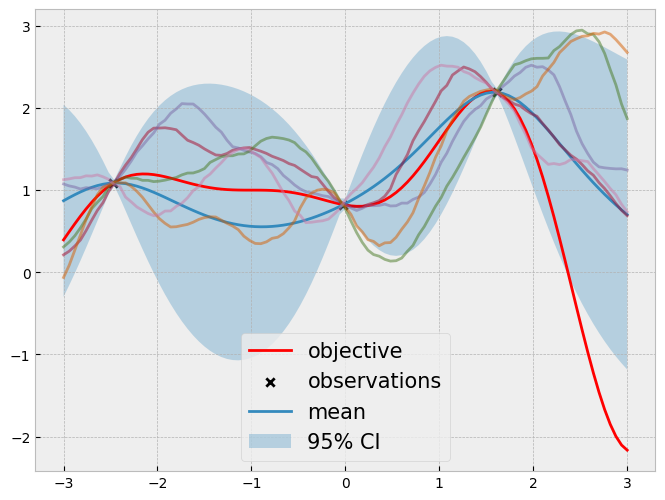

In [33]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = MaternGPModel(train_x, train_y, likelihood, 2.5)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)

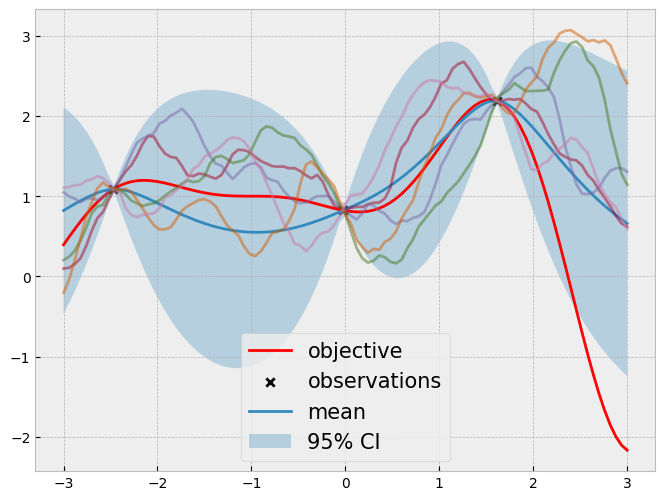

In [34]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = MaternGPModel(train_x, train_y, likelihood, 1.5)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)

# Go 2D!

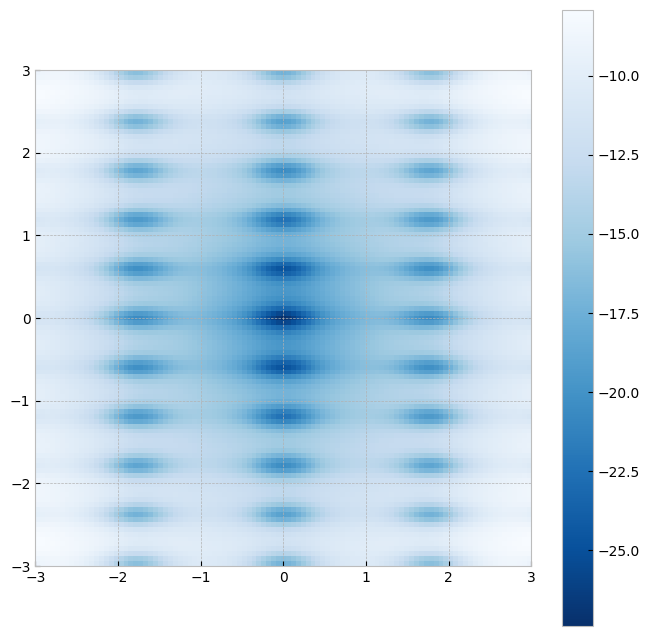

In [35]:
def ackley(x):
    # a modification of https://www.sfu.ca/~ssurjano/ackley.html
    return -20 * torch.exp(
        -0.2 * torch.sqrt((x[:, 0] ** 2 + x[:, 1] ** 2) / 2)
    ) - torch.exp(torch.cos(2 * pi * x[:, 0] / 3) + torch.cos(2 * pi * x[:, 1]))


xs = torch.linspace(-5, 5, 101)
x1, x2 = torch.meshgrid(xs, xs, indexing="ij")
xs = torch.vstack((x1.flatten(), x2.flatten())).transpose(-1, -2)
ys = ackley(xs)

plt.figure(figsize=(8, 8))

plt.imshow(ys.reshape(101, 101).T, origin="lower", extent=[-3, 3, -3, 3])
plt.colorbar();

In [36]:
torch.manual_seed(0)
train_x = torch.rand(size=(100, 2)) * 6 - 3
train_y = ackley(train_x)

In [37]:
class ARDGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(ard_num_dims=2)
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [38]:
# declare the GP
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ARDGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.likelihood.noise = noise

# train the hyperparameter (the constant)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()

losses = []
x_lengthscales = []
y_lengthscales = []
outputscales = []
for i in tqdm(range(500)):
    optimizer.zero_grad()

    output = model(train_x)
    loss = -mll(output, train_y)

    loss.backward()

    losses.append(loss.item())
    x_lengthscales.append(model.covar_module.base_kernel.lengthscale[0, 0].item())
    y_lengthscales.append(model.covar_module.base_kernel.lengthscale[0, 1].item())
    outputscales.append(model.covar_module.outputscale.item())

    optimizer.step()

model.eval()
likelihood.eval()

  0%|          | 0/500 [00:00<?, ?it/s]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

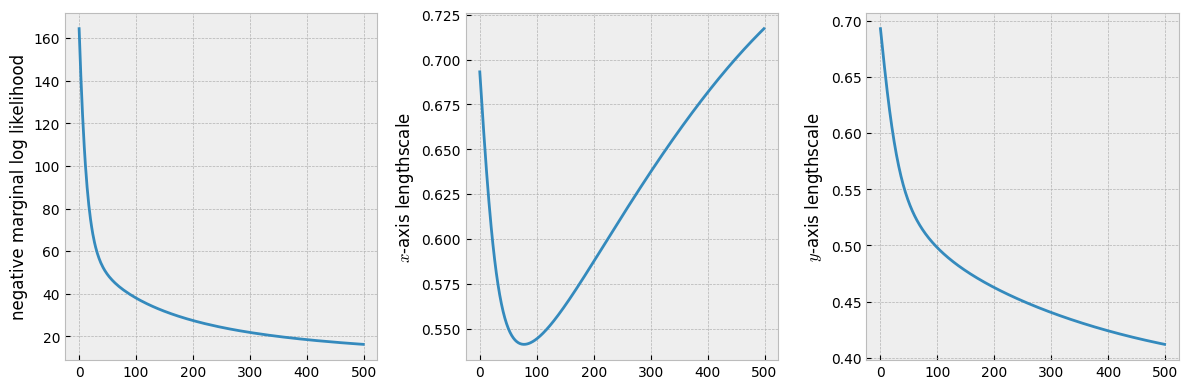

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(losses)
ax[0].set_ylabel("negative marginal log likelihood")

ax[1].plot(x_lengthscales)
ax[1].set_ylabel(r"$x$-axis lengthscale")

ax[2].plot(y_lengthscales)
ax[2].set_ylabel(r"$y$-axis lengthscale")

plt.tight_layout();

In [40]:
model.covar_module.base_kernel.lengthscale

tensor([[0.7175, 0.4117]], grad_fn=<SoftplusBackward0>)

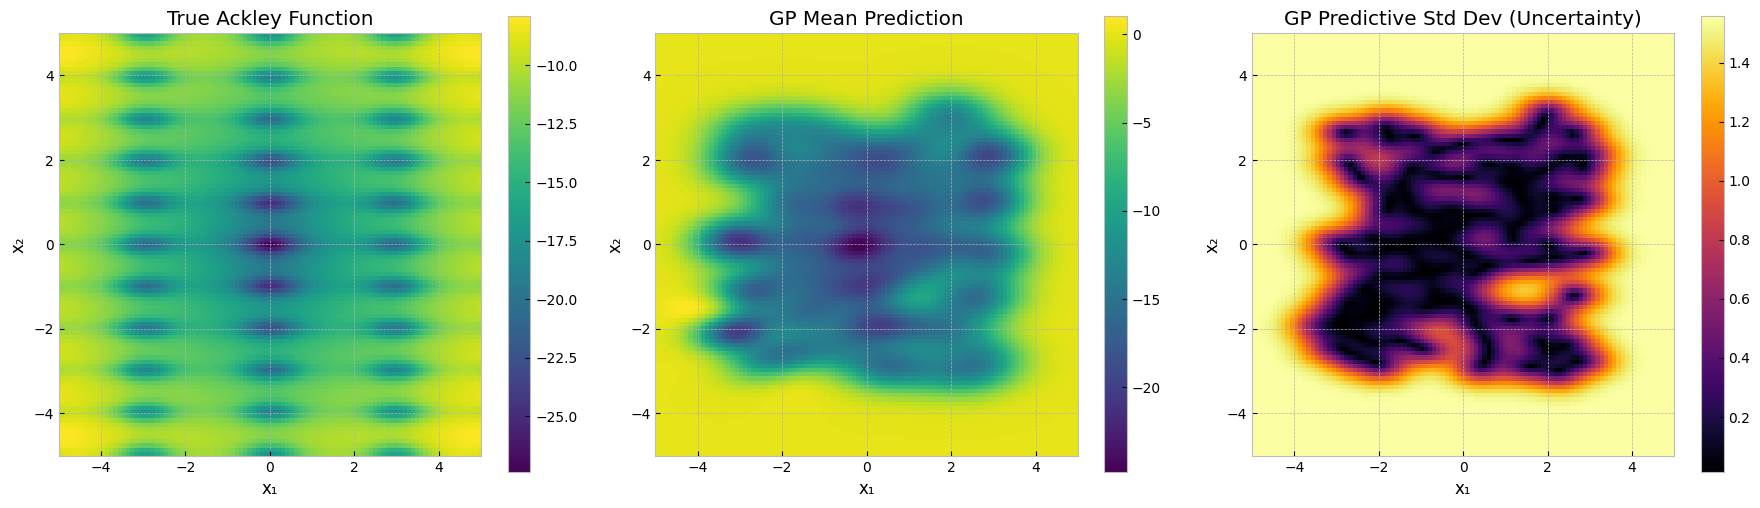

In [41]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from math import pi

'''
# Ackley function definition
def ackley(x):
    return -20 * torch.exp(-0.2 * torch.sqrt((x[:, 0] ** 2 + x[:, 1] ** 2) / 2)) - \
           torch.exp(torch.cos(2 * pi * x[:, 0] / 3) + torch.cos(2 * pi * x[:, 1]))
'''

# Create input grid
xs = torch.linspace(-5, 5, 101)
x1, x2 = torch.meshgrid(xs, xs, indexing="ij")
grid = torch.stack([x1.reshape(-1), x2.reshape(-1)], dim=-1)

# Evaluate Ackley function
ys = ackley(grid)

# GP predictions
model.eval()
likelihood.eval()
with torch.no_grad():
    preds = likelihood(model(grid))
    mean = preds.mean.reshape(101, 101).numpy()
    std = preds.stddev.reshape(101, 101).numpy()

# Plot side-by-side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# True function
axs[0].imshow(ys.reshape(101, 101).T, extent=[-5, 5, -5, 5], origin="lower", cmap="viridis")
axs[0].set_title("True Ackley Function")
axs[0].set_xlabel("x₁")
axs[0].set_ylabel("x₂")
fig.colorbar(axs[0].images[0], ax=axs[0])

# GP mean
axs[1].imshow(mean.T, extent=[-5, 5, -5, 5], origin="lower", cmap="viridis")
axs[1].set_title("GP Mean Prediction")
axs[1].set_xlabel("x₁")
axs[1].set_ylabel("x₂")
fig.colorbar(axs[1].images[0], ax=axs[1])

# GP uncertainty
axs[2].imshow(std.T, extent=[-5, 5, -5, 5], origin="lower", cmap="inferno")
axs[2].set_title("GP Predictive Std Dev (Uncertainty)")
axs[2].set_xlabel("x₁")
axs[2].set_ylabel("x₂")
fig.colorbar(axs[2].images[0], ax=axs[2])

plt.tight_layout()
plt.show()


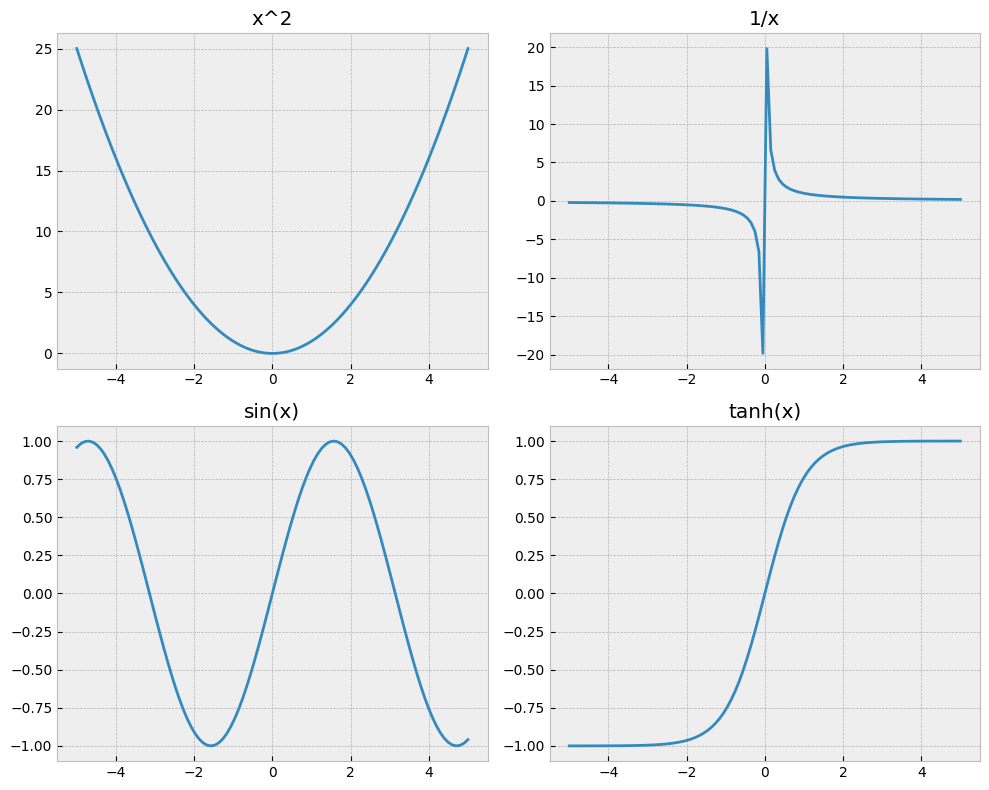

In [42]:
# prompt: generate a 2x2 plot of functions x^2, 1/x. sin(x), and tanh(x)

import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f1(x):
  return x**2

def f2(x):
  return 1/x

def f3(x):
  return np.sin(x)

def f4(x):
  return np.tanh(x)

# Create the x-values
x = np.linspace(-5, 5, 100)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the functions
axes[0, 0].plot(x, f1(x))
axes[0, 0].set_title('x^2')

axes[0, 1].plot(x, f2(x))
axes[0, 1].set_title('1/x')

axes[1, 0].plot(x, f3(x))
axes[1, 0].set_title('sin(x)')

axes[1, 1].plot(x, f4(x))
axes[1, 1].set_title('tanh(x)')

# Adjust layout and display
plt.tight_layout()
plt.show()
